In [ ]:
# This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5, stratify=y_train)

In [ ]:
print(len(y_train), len(y_val), len(y_test))

25000 25000 10000


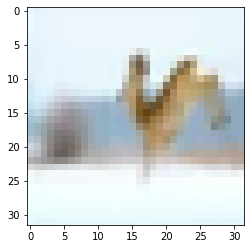

In [ ]:
plt.imshow(x_train[0])
plt.show()

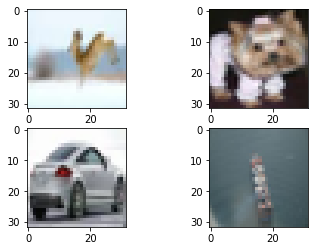

In [ ]:
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])
plt.show()

In [ ]:
# need to specify 32x32 and 3 channels since it's a colored dataset
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_val = x_val.reshape(x_val.shape[0], 32, 32, 3).astype('float32')

In [ ]:
# need to normalize values 
x_train = x_train / 255
x_test = x_test / 255
x_val = x_val / 255

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print(num_classes)

10


In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Conv2D(40, (3, 3), input_shape=(32, 32, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(120, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(180, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(130, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = baseline_model()

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=80, batch_size=300)

Epoch 1/80
84/84 [==============================] - 73s 863ms/step - loss: 1.8152 - accuracy: 0.3156 - val_loss: 1.5988 - val_accuracy: 0.4124
Epoch 2/80
84/84 [==============================] - 76s 903ms/step - loss: 1.5991 - accuracy: 0.4078 - val_loss: 1.4278 - val_accuracy: 0.4768
Epoch 3/80
84/84 [==============================] - 71s 840ms/step - loss: 1.4682 - accuracy: 0.4646 - val_loss: 1.3397 - val_accuracy: 0.5248
Epoch 4/80
84/84 [==============================] - 71s 849ms/step - loss: 1.3870 - accuracy: 0.5038 - val_loss: 1.2806 - val_accuracy: 0.5485
Epoch 5/80
84/84 [==============================] - 73s 866ms/step - loss: 1.3243 - accuracy: 0.5252 - val_loss: 1.2144 - val_accuracy: 0.5660
Epoch 6/80
84/84 [==============================] - 71s 846ms/step - loss: 1.2673 - accuracy: 0.5480 - val_loss: 1.2360 - val_accuracy: 0.5550
Epoch 7/80
84/84 [==============================] - 73s 873ms/step - loss: 1.2202 - accuracy: 0.5661 - val_loss: 1.1222 - val_accuracy: 0.6059

In [ ]:
scores = model.evaluate(x_test, y_test)
result_error = str('%.2f'%(1 - scores[1]))
print('Error: ', result_error)

313/313 [==============================] - 7s 22ms/step - loss: 1.2647 - accuracy: 0.7255
Error:  0.27


In [ ]:
!pip install pyyaml h5py

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/model_cifar10_AnneLivia.json" , "w") as json_file:
    json_file.write(model_json)

#serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/Colab Notebooks/model_w_cifar10_AnneLivia.h5" )